In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-csv/matches.csv
/kaggle/input/students-csv/reg-month2.xlsx
/kaggle/input/students-csv/reg-month1.csv
/kaggle/input/students-csv/courses.csv
/kaggle/input/students-csv/students.csv
/kaggle/input/ipl-deliveries-dataset/deliveries.csv


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
deliveries=pd.read_csv('/kaggle/input/ipl-deliveries-dataset/deliveries.csv')
matches=pd.read_csv('/kaggle/input/students-csv/matches.csv')
nov=pd.read_csv('/kaggle/input/students-csv/reg-month1.csv')
dec=pd.read_excel('/kaggle/input/students-csv/reg-month2.xlsx')
courses=pd.read_csv('/kaggle/input/students-csv/courses.csv')
students=pd.read_csv('/kaggle/input/students-csv/students.csv')

In [3]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


# `concat function`

In [9]:
members=pd.concat([nov,dec],ignore_index=True)
members

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [5]:
multi=pd.concat([nov,dec],keys=['nov','dec'])
multi.loc['dec',4]

student_id    14
course_id      9
Name: (dec, 4), dtype: int64

In [6]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


# `merge function`

## `inner join`

In [7]:
students.merge(members,how='inner')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


## `left join`

In [8]:
courses.merge(members,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


## `right join`

In [9]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [10]:
students.merge(members,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


## `full outer join`

In [11]:
students.merge(members,how='outer',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
...,...,...,...,...
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0


# 1. find total revenue generated

In [15]:
members.merge(courses,how='inner',on='course_id')['price'].sum()

154247

# 2. month by month reveneu generated

In [25]:
nov.merge(courses,how='inner',on='course_id')['price'].sum()

89175

In [26]:
dec.merge(courses,how='inner',on='course_id')['price'].sum()

65072

In [30]:
temp_df=multi.reset_index()
temp_df.merge(courses,how='inner',on='course_id').groupby('level_0')['price'].sum()

level_0
dec    65072
nov    89175
Name: price, dtype: int64

In [32]:
courses

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499
5,6,power bi,1899
6,7,ms sxcel,1599
7,8,pandas,1099
8,9,plotly,699
9,10,pyspark,2499


# 3. Print the registration table
# cols -> name -> course -> price

In [36]:
temp=members.merge(students,on='student_id').merge(courses,on='course_id')
temp[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


# 4. Plot bar chart for revenue/course

<Axes: ylabel='course_name'>

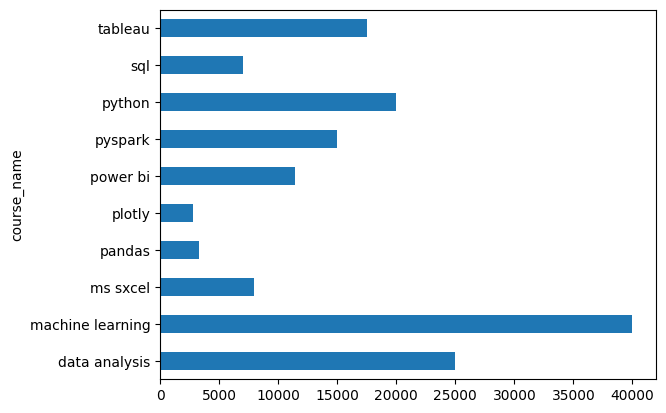

In [39]:
temp.groupby('course_name')['price'].sum().plot(kind='barh')

 # 5. find students who enrolled in both the months

In [59]:
x=np.intersect1d(nov['student_id'],dec['student_id'])
x

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [62]:
temp[temp['student_id'].isin(x)]

,student_id,course_id,name,partner,course_name,price
0,23,1,Chhavi Lachman,18,python,2499
2,18,6,Fardeen Mahabir,13,power bi,1899
3,23,4,Chhavi Lachman,18,machine learning,9999
4,16,9,Elias Dodiya,25,plotly,699
5,18,1,Fardeen Mahabir,13,python,2499
6,1,1,Kailash Harjo,23,python,2499
7,7,8,Tarun Thaker,9,pandas,1099
8,22,3,Yash Sethi,21,data analysis,4999
11,1,6,Kailash Harjo,23,power bi,1899
12,7,10,Tarun Thaker,9,pyspark,2499


# 6. find course that got no enrollment

In [67]:
no_enroll=courses.merge(members,how='left',on='course_id')
no_enroll[no_enroll['student_id'].isna()]

,course_id,course_name,price,student_id
53,11,Numpy,699,NaN
54,12,C++,1299,NaN


In [73]:
no_members=np.setdiff1d(courses['course_id'],members['course_id'])

In [74]:
courses[courses['course_id'].isin(no_members)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


# 7. find students who did not enroll into any courses

In [77]:
no_purchase=students.merge(members,how='left',on='student_id')
no_purchase[no_purchase['course_id'].isna()]

,student_id,name,partner,course_id
7,4,Marlo Dugal,14,NaN
8,5,Kusum Bahri,6,NaN
9,6,Lakshmi Contractor,10,NaN
15,8,Radheshyam Dey,5,NaN
16,9,Nitika Chatterjee,4,NaN
17,10,Aayushman Sant,8,NaN
43,20,Hanuman Hegde,11,NaN


In [78]:
x=np.setdiff1d(students['student_id'],members['student_id'])

array([ 4,  5,  6,  8,  9, 10, 20])

In [79]:
students[students['student_id'].isin(x)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


# 8. Print student name -> partner name for all enrolled students

In [96]:
enrolled_students=students.merge(members,how='left',on='student_id')
unique_partner_names=enrolled_students[enrolled_students['course_id'
].notna()].merge(enrolled_students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']].drop_duplicates()

In [99]:
unique_partner_names

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
24,Esha Butala,Kailash Harjo
28,Parveen Bhalla,Parveen Bhalla
32,Tarun Thaker,Nitika Chatterjee
37,David Mukhopadhyay,Hanuman Hegde
40,Radha Dutt,Qabeel Raman
48,Munni Varghese,Radhika Suri
49,Pranab Natarajan,Yash Sethi
61,Preet Sha,Elias Dodiya
69,Elias Dodiya,Shashank D’Alia


# 9. find top 3 students who did most number enrollments

In [110]:
enrolled_students=students.merge(members,how='left',on='student_id')
enrolled_students[enrolled_students['course_id'].notna()].groupby('student_id')['name'].count().sort_values(ascending=False).head(3)

student_id
23    6
7     5
1     4
Name: name, dtype: int64

In [112]:
students[students['student_id'].isin([23,7,1])]

,student_id,name,partner
0,1,Kailash Harjo,23
6,7,Tarun Thaker,9
22,23,Chhavi Lachman,18


# 10. find top 3 students who spent most amount of money on courses

In [18]:
enrolled_students=students.merge(members,how='left',on='student_id')
enrolled_students[enrolled_students['course_id'].notna()
].merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

# Alternate syntax for merge

In [21]:
pd.merge(students,members,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
merge_df=pd.merge(deliveries,matches,how='inner',left_on='match_id',right_on='id')
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [7]:
num_sixes=merge_df[merge_df['batsman_runs']==6].groupby('venue')['batsman_runs'].count().sort_values(ascending=False)
num_sixes

venue
M Chinnaswamy Stadium                                   873
Wankhede Stadium                                        657
Feroz Shah Kotla                                        636
Eden Gardens                                            594
MA Chidambaram Stadium, Chepauk                         507
Rajiv Gandhi International Stadium, Uppal               492
Punjab Cricket Association Stadium, Mohali              307
Sawai Mansingh Stadium                                  243
Dr DY Patil Sports Academy                              173
Maharashtra Cricket Association Stadium                 169
Subrata Roy Sahara Stadium                              141
Sardar Patel Stadium, Motera                            130
Kingsmead                                               130
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     129
SuperSport Park                                         120
Brabourne Stadium                                       114
Himachal Pradesh Cricket Associati

In [8]:
total_matches=matches['venue'].value_counts()
total_matches

venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                 

In [9]:
(num_sixes/total_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

In [63]:
merge_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
